In [4]:
from tensorflow.keras import models,layers
# TensorFlow是一個機器學習框架，是一個用於機器學習的開源軟體庫，可以支援深度學習的各種演算法
# Keras是一個開放原始碼，基於Python"高階"深度學習的程式庫。
import matplotlib.pyplot as plt
# 資料視覺化library

In [5]:
# 讀取dataset
import tensorflow as tf
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./images/PlantVillage/PlantVillage",
    shuffle=True,  # 打亂數據
    image_size=(256, 256),  # 統一圖片size
    batch_size=32   #批次大小: 32
)

# 根據目錄結構找出class names
class_names = dataset.class_names
print(class_names)

Found 2152 files belonging to 3 classes.
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


(32, 256, 256, 3)
[0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 2 1]


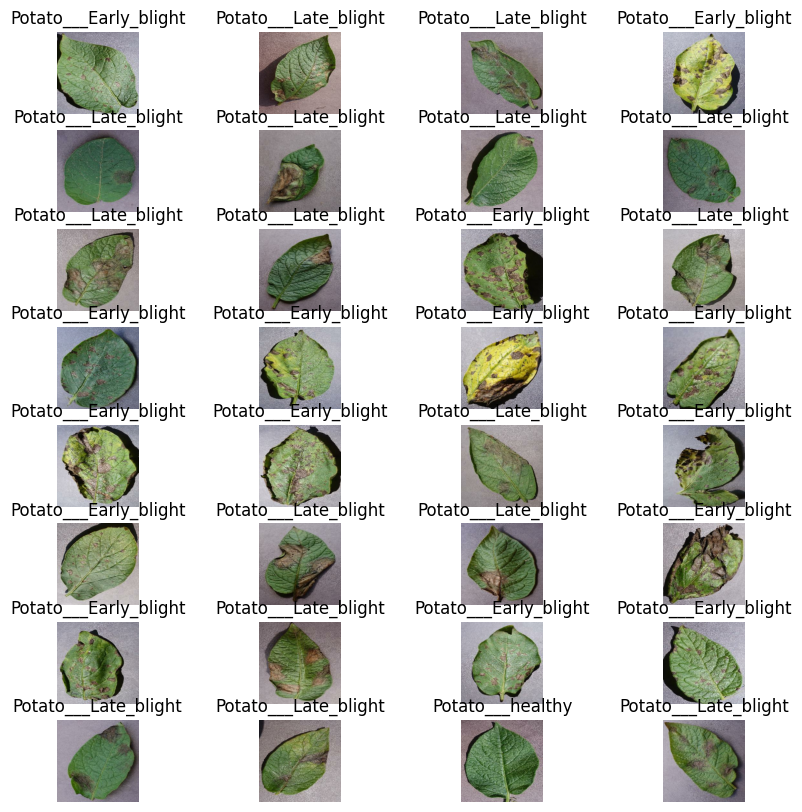

In [19]:
# 設定圖表大小
plt.figure(figsize=(10, 10))

#取出第一批次圖像與標籤
for image_batch, labels_batch in dataset.take(1):  
    print(image_batch.numpy().shape)    # ".numpy()": 轉為numpy, ".shape()": 查看維度
    print(labels_batch.numpy())         
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)   #切成8*4把32張圖片放入
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
        
# 0: early, 1: late, 2: healthy

In [7]:
# 分割訓練集，驗證集，測試集
train_split = 0.8   #80%
val_split = 0.1     #10%
test_split = 0.1    #10%

ds_size = len(dataset)
print(ds_size)
shuffle_size = 1000
# 資料打亂
dataset = dataset.shuffle(shuffle_size, seed=12)

# 計算每個子集的大小
train_size = int(train_split * ds_size)
val_size = int(val_split * ds_size)

# 分割數據集
train_ds = dataset.take(train_size)     #take獲取指定範圍資料
remaining_ds = dataset.skip(train_size) #skip略過前面被拿過的
val_ds = remaining_ds.take(val_size)    
test_ds = remaining_ds.skip(val_size)

# 確認每個數據集的大小
print("訓練集大小:", len(list(train_ds)))
print("驗證集大小:", len(list(val_ds)))
print("測試集大小:", len(list(test_ds)))

68
訓練集大小: 54
驗證集大小: 6
測試集大小: 8


In [8]:
# 圖片pre-processing 確保資料格式統一與方便訓練
resize_and_rescale = tf.keras.Sequential([
    # 圖片統一size
    layers.Resizing(256, 256),
    # 資料標準化: 0~1
    layers.Rescaling(1.0/255)
])

In [9]:
# 資料增強(資料量太少)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # 隨機水平垂直翻轉
    layers.RandomRotation(0.2)  # 隨機旋轉
])

In [11]:
input_shape = (32 , 256 , 256 , 3)
n_classes = 3

# 依序建立模型
model = models.Sequential([
    resize_and_rescale, # 前處理層
    data_augmentation,  # 資料增強
    
    # Filter數量:64
    # 卷積核size:3*3
    layers.Conv2D(64, kernel_size =(3,3) ,activation ='relu', input_shape = input_shape),
    # 減少特徵圖尺寸，保留重要特徵
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size =(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size =(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size =(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size =(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size =(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),

    # 攤平放入全連接層
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    # 輸出3類別，激勵函數用softmax
    layers.Dense(n_classes , activation = 'softmax'),
])

model.build(input_shape = input_shape)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,075 (793.26 KB)

 Trainable params: 203,075 (793.26 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 定義優化器(Adam)，loss function，準確度指標
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),    # 適用於多分類問題的loss function
    metrics = ['accuracy']
)

In [27]:
history = model.fit(
    train_ds,               # 訓練數據集
    batch_size=32,          # 批次大小，即每次訓練時使用的樣本數量
    validation_data=val_ds, # 驗證數據集，用於在每個 epoch 結束後評估模型性能
    verbose=1,              # 訓練過程中顯示訊息的詳細程度。0：不顯示訓練過程，1：顯示進度條，2：每個 epoch 顯示一行
    epochs=10               # 訓練的 epoch 數量，即整個訓練數據集被遍歷的次數
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.4838 - loss: 0.9321 - val_accuracy: 0.4948 - val_loss: 0.8703
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.5863 - loss: 0.8135 - val_accuracy: 0.7708 - val_loss: 0.4836
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7912 - loss: 0.4801 - val_accuracy: 0.9115 - val_loss: 0.2928
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8366 - loss: 0.3869 - val_accuracy: 0.8698 - val_loss: 0.3340
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.8821 - loss: 0.2771 - val_accuracy: 0.8385 - val_loss: 0.3476
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8832 - loss: 0.3127 - val_accuracy: 0.9271 - val_loss: 0.1968
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.9315 - loss: 0.1975 - val_accuracy: 0.8854 - val_loss: 0.3255
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9206 - loss: 0.2301 - val_accuracy: 0.9010 -

In [28]:
# 使用測試集分析準確度
score = model.evaluate(test_ds)
score
# loss, accuracy

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9253 - loss: 0.2057


[0.20197266340255737, 0.9375]